# How Covid-19 Affected Euro-USD Exchange Rate

In this small data visualization project, we are going to plot how Covid-19 Affected the exchange rate between euro and USD. The data is from [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020) by Daria Chemkaeva.

## Reading data

In [34]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head(5))
print(exchange_rates.tail(5))
print(exchange_rates.info())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

## Data cleaning

In this section we are going to clean the data for our purposes. We are only focusing on exchange rates between US dollar and Euro.

In [35]:
#Changing column names
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
#Time to datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
#Sorting by time
exchange_rates.sort_values('Time', inplace=True)
#Reseting indexes
exchange_rates.reset_index(drop=True, inplace=True)

In [36]:
#Assigning new dataframe
euro_to_dollar = exchange_rates[['US_dollar', 'Time']]
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
0.9974     1
0.9565     1
1.0488     1
0.9717     1
1.2814     1
Name: US_dollar, Length: 3528, dtype: int64

In [37]:
#Deleting 62 "-" values, converting to float
euro_to_dollar = euro_to_dollar.drop(euro_to_dollar[euro_to_dollar['US_dollar'] == "-"].index)
euro_to_dollar['US_dollar'].value_counts()
euro_to_dollar['US_dollar'].astype(float)

0       1.1789
1       1.1790
2       1.1743
3       1.1632
4       1.1659
         ...  
5694    1.2296
5695    1.2271
5696    1.2338
5697    1.2276
5698    1.2250
Name: US_dollar, Length: 5637, dtype: float64

# Data Visualization

Next we are going to plot how the exchange rate changed from 2019 to 2021. To begin, we are going to create a new column that has the rolling mean for the US dollar. Moving window for the rolling mean is 30 days.

In [38]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

### How Covid-19 Affected Euro-Dollar rate

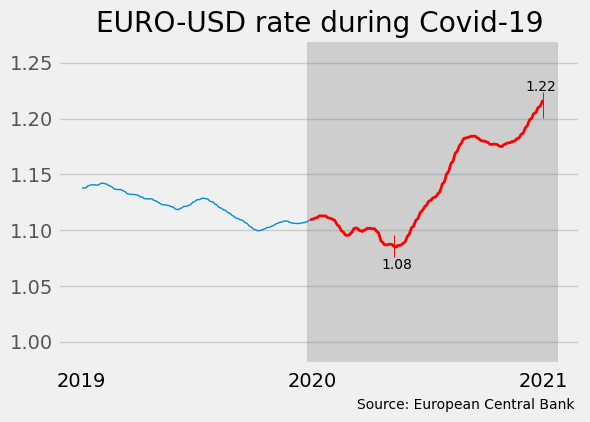

In [228]:
import matplotlib.pyplot as pl
%matplotlib inline 
filtered_data = euro_to_dollar[euro_to_dollar['Time'].dt.year >= 2019]
covid_data = euro_to_dollar[euro_to_dollar['Time'].dt.year >= 2020]

#plotting
plt.style.use('fivethirtyeight')
plt.plot(filtered_data['Time'], filtered_data['rolling_mean'],linewidth=1)
plt.plot(covid_data['Time'], covid_data['rolling_mean'], color = 'r', linewidth=2)
plt.ylim(0.98, 1.27)
#changing xticks to years only
plt.axvspan(xmin=737420, xmax = 737820, alpha=0.3, color='grey')
plt.xticks([])
x = 737020
for year in [2019, 2020, 2021]:
    plt.text(x=x, y =0.96, s=year)
    x += 370
plt.text(x=737500, y= 0.94, s='Source: European Central Bank', fontsize=10)
plt.text(x=737540, y= 1.065, s=round(min(covid_data['rolling_mean']),2), fontsize=10)
plt.text(x=737770, y= 1.225, s=round(max(covid_data['rolling_mean']),2), fontsize=10)
plt.axvline(x=737560, ymin = 0.33, ymax=0.4, linewidth = 0.7, color = 'r')
plt.axvline(x=737798, ymin = 0.76, ymax=0.84, linewidth = 0.7, color = 'r')
plt.title('EURO-USD rate during Covid-19')
plt.show()

From the graph above we can see that Covid-19 increased the EURO-USD exchange rate from around 1.10 to 1.22. The lowest exchange rate was 1.08, but after that it increased up to 1.22.